# **Artificial Intelligence & Machine Learning CW**

## **STARBUCKS CORPORATION (SBUX)**

### **Company Selection and Brief Introduction**

The company chosen for the realization of the course work is Starbucks Corporation® listed in the NYSE with ticker (SBUX)

In [1]:
!pip install --user yahooquery

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from yahooquery import Ticker  

SBUX = 'SBUX'  
ticker = Ticker(SBUX)
company_details = ticker.asset_profile
if SBUX in company_details:
    company_description = company_details[SBUX].get('longBusinessSummary', 'No description found.')
else:
    company_description = 'Company details not found for the provided ticker symbol.'
print(company_description)


Starbucks Corporation, together with its subsidiaries, operates as a roaster, marketer, and retailer of specialty coffee worldwide. The company operates through three segments: North America, International, and Channel Development. Its stores offer coffee and tea beverages, roasted whole beans and ground coffees, single serve products, and ready-to-drink beverages; and various food products, such as pastries, breakfast sandwiches, and lunch items. The company also licenses its trademarks through licensed stores, and grocery and foodservice accounts. The company offers its products under the Starbucks, Teavana, Seattle's Best Coffee, Evolution Fresh, Ethos, Starbucks Reserve, and Princi brands. Starbucks Corporation has company-operated and licensed stores in North America and internationally. The company was founded in 1971 and is based in Seattle, Washington.


In [4]:
key_stats = ticker.key_stats[SBUX]
print (key_stats)

{'maxAge': 1, 'priceHint': 2, 'enterpriseValue': 141803683840, 'forwardPE': 21.907024, 'profitMargins': 0.11465, 'floatShares': 1118708234, 'sharesOutstanding': 1142599936, 'sharesShort': 10310532, 'sharesShortPriorMonth': 13591447, 'sharesShortPreviousMonthDate': '2023-09-29 01:00:00', 'dateShortInterest': '2023-10-31 00:00:00', 'sharesPercentSharesOut': 0.009, 'heldPercentInsiders': 0.02083, 'heldPercentInstitutions': 0.73457, 'shortRatio': 1.77, 'shortPercentOfFloat': 0.0092, 'beta': 0.976, 'impliedSharesOutstanding': 1151650048, 'category': None, 'bookValue': -6.997, 'fundFamily': None, 'legalType': None, 'lastFiscalYearEnd': '2023-10-01 01:00:00', 'nextFiscalYearEnd': '2024-10-01 01:00:00', 'mostRecentQuarter': '2023-10-01 01:00:00', 'earningsQuarterlyGrowth': 0.388, 'netIncomeToCommon': 4124499968, 'trailingEps': 3.58, 'forwardEps': 4.84, 'pegRatio': 1.46, 'lastSplitFactor': '2:1', 'lastSplitDate': '2015-04-09 01:00:00', 'enterpriseToRevenue': 3.942, 'enterpriseToEbitda': 20.394,

In [5]:
esg_scores = ticker.esg_scores[SBUX]
print(esg_scores)


{'maxAge': 86400, 'totalEsg': 24.83, 'environmentScore': 6.11, 'socialScore': 14.5, 'governanceScore': 4.21, 'ratingYear': 2022, 'ratingMonth': 8, 'highestControversy': 3.0, 'peerCount': 44, 'esgPerformance': 'AVG_PERF', 'peerGroup': 'Consumer Services', 'relatedControversy': ['Employee Incidents'], 'peerEsgScorePerformance': {'min': 13.3, 'avg': 22.78954545454545, 'max': 31.02}, 'peerGovernancePerformance': {'min': 3.09, 'avg': 6.590975609756098, 'max': 13.5}, 'peerSocialPerformance': {'min': 6.55, 'avg': 10.78756097560976, 'max': 16.68}, 'peerEnvironmentPerformance': {'min': 0.15, 'avg': 5.711219512195122, 'max': 13.59}, 'peerHighestControversyPerformance': {'min': 0.0, 'avg': 2.0681818181818183, 'max': 4.0}, 'percentile': 43.47, 'environmentPercentile': None, 'socialPercentile': None, 'governancePercentile': None, 'adult': False, 'alcoholic': False, 'animalTesting': False, 'catholic': False, 'controversialWeapons': False, 'smallArms': False, 'furLeather': False, 'gambling': False, '

In [6]:
print (company_details)

{'SBUX': {'address1': '2401 Utah Avenue South', 'city': 'Seattle', 'state': 'WA', 'zip': '98134', 'country': 'United States', 'phone': '206 447 1575', 'website': 'https://www.starbucks.com', 'industry': 'Restaurants', 'industryKey': 'restaurants', 'industryDisp': 'Restaurants', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': "Starbucks Corporation, together with its subsidiaries, operates as a roaster, marketer, and retailer of specialty coffee worldwide. The company operates through three segments: North America, International, and Channel Development. Its stores offer coffee and tea beverages, roasted whole beans and ground coffees, single serve products, and ready-to-drink beverages; and various food products, such as pastries, breakfast sandwiches, and lunch items. The company also licenses its trademarks through licensed stores, and grocery and foodservice accounts. The company offers its products under the

In [7]:
# Now, create a DataFrame from the company info, assuming it's a dictionary
# For this example, we'll just put the ESG scores into the table as well
company_data_table = pd.DataFrame({
    'Ticker': SBUX,
    'Name': company_details.get('companyName'),
    'Sector': company_details.get('sector'),
    'Industry': company_details.get('industry'),
    'Full Time Employees': company_details.get('fullTimeEmployees'),
    
    # Assume ESG Scores are a dictionary like {'environment': 1, 'social': 2, 'governance': 3}
    'ESG Total Score': esg_scores.get('totalEsg'),
    'Environment Score': esg_scores.get('environmentScore'),
    'Social Score': esg_scores.get('socialScore'),
    'Governance Score': esg_scores.get('governanceScore'),
}, index=[0])

print(company_data_table)

  Ticker  Name Sector Industry Full Time Employees  ESG Total Score  \
0   SBUX  None   None     None                None            24.83   

   Environment Score  Social Score  Governance Score  
0               6.11          14.5              4.21  


### **Historical Data Obtention**

Obtain historical data on the company’s daily stock prices from 01/2013 – 12/2022 from Yahoo Finance or other platforms/websites. If the data is not available sometime during the period, use the maximum available length of the period.

In [8]:
ticker.history()

open        high         low       close    volume  \
symbol date                                                                   
SBUX   2023-01-03  100.559998  101.169998   99.470001  100.830002   6607700   
       2023-01-04  102.690002  104.730003  102.550003  104.459999   8166600   
       2023-01-05  104.489998  105.099998  103.489998  104.430000   5575100   
       2023-01-06  105.379997  107.000000  105.010002  106.690002   9644100   
       2023-01-09  106.519997  106.680000  104.430000  104.739998  10124800   
...                       ...         ...         ...         ...       ...   
       2023-11-09  104.300003  104.459999  102.029999  102.230003   7607000   
       2023-11-10  102.599998  104.349998  101.980003  104.330002   7338500   
       2023-11-13  103.919998  104.230003  102.959999  103.510002   7120800   
       2023-11-14  104.480003  105.820000  104.239998  105.599998   8323000   
       2023-11-15  105.660004  106.540001  105.660004  106.029999   7977000   

                     adjclose  dividends  
symbol date                               
SBUX   2023-01-03   98.757988       0.00  
       2023-01-04  102.313393       0.00  
       2023-01-05  102.284012       0.00  
       2023-01-06  104.497574       0.00  
       2023-01-09  102.587631       0.00  
...                       ...        ...  
       2023-11-09  102.230003       0.57  
       2023-11-10  104.330002       0.00  
       2023-11-13  103.510002       0.00  
       2023-11-14  105.599998       0.00  
       2023-11-15  106.029999       0.00  

[220 rows x 7 columns]

In [9]:
ticker.history(period='max')

open        high         low       close     volume  \
symbol date                                                                    
SBUX   1992-06-26    0.328125    0.347656    0.320313    0.335938  224358400   
       1992-06-29    0.339844    0.367188    0.332031    0.359375   58732800   
       1992-06-30    0.367188    0.371094    0.343750    0.347656   34777600   
       1992-07-01    0.351563    0.359375    0.339844    0.355469   18316800   
       1992-07-02    0.359375    0.359375    0.347656    0.355469   13996800   
...                       ...         ...         ...         ...        ...   
       2023-11-09  104.300003  104.459999  102.029999  102.230003    7607000   
       2023-11-10  102.599998  104.349998  101.980003  104.330002    7338500   
       2023-11-13  103.919998  104.230003  102.959999  103.510002    7120800   
       2023-11-14  104.480003  105.820000  104.239998  105.599998    8323000   
       2023-11-15  105.660004  106.540001  105.660004  106.029999    7977000   

                     adjclose  dividends  splits  
symbol date                                       
SBUX   1992-06-26    0.264262       0.00     0.0  
       1992-06-29    0.282698       0.00     0.0  
       1992-06-30    0.273479       0.00     0.0  
       1992-07-01    0.279625       0.00     0.0  
       1992-07-02    0.279625       0.00     0.0  
...                       ...        ...     ...  
       2023-11-09  102.230003       0.57     0.0  
       2023-11-10  104.330002       0.00     0.0  
       2023-11-13  103.510002       0.00     0.0  
       2023-11-14  105.599998       0.00     0.0  
       2023-11-15  106.029999       0.00     0.0  

[7906 rows x 8 columns]

In [10]:
df=ticker.history(start='2013-01-01', end='2023-01-31') 
df

open        high         low       close    volume  \
symbol date                                                                   
SBUX   2013-01-02   27.295000   27.500000   27.129999   27.500000  13267600   
       2013-01-03   27.535000   27.805000   27.500000   27.684999  14670400   
       2013-01-04   27.764999   28.000000   27.655001   27.844999  10911400   
       2013-01-07   27.700001   27.895000   27.504999   27.860001   8720000   
       2013-01-08   27.790001   27.860001   27.535000   27.809999   9613400   
...                       ...         ...         ...         ...       ...   
       2023-01-24  106.400002  106.870003  105.410004  106.639999   5517200   
       2023-01-25  106.059998  107.139999  105.900002  106.980003   5416900   
       2023-01-26  107.300003  108.800003  107.059998  108.760002   6324100   
       2023-01-27  108.739998  109.760002  108.339996  109.019997   6851100   
       2023-01-30  108.260002  108.870003  107.419998  108.400002   6880700   

                     adjclose  dividends  splits  
symbol date                                       
SBUX   2013-01-02   22.588531        0.0     0.0  
       2013-01-03   22.740490        0.0     0.0  
       2013-01-04   22.871916        0.0     0.0  
       2013-01-07   22.884235        0.0     0.0  
       2013-01-08   22.843163        0.0     0.0  
...                       ...        ...     ...  
       2023-01-24  104.448593        0.0     0.0  
       2023-01-25  104.781616        0.0     0.0  
       2023-01-26  106.525024        0.0     0.0  
       2023-01-27  106.779686        0.0     0.0  
       2023-01-30  106.172432        0.0     0.0  

[2537 rows x 8 columns]

In [11]:
# Save data in memory to disk

df.to_csv('Sbux_Data_Stock_Date.csv')
df.to_csv('Sbux_Data_Stock_No_Date.csv', index=False)

In [12]:
df = pd.read_csv('Sbux_Data_Stock_Date.csv')
df

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,SBUX,2013-01-02,27.295000,27.500000,27.129999,27.500000,13267600,22.588531,0.0,0.0
1,SBUX,2013-01-03,27.535000,27.805000,27.500000,27.684999,14670400,22.740490,0.0,0.0
2,SBUX,2013-01-04,27.764999,28.000000,27.655001,27.844999,10911400,22.871916,0.0,0.0
3,SBUX,2013-01-07,27.700001,27.895000,27.504999,27.860001,8720000,22.884235,0.0,0.0
4,SBUX,2013-01-08,27.790001,27.860001,27.535000,27.809999,9613400,22.843163,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2532,SBUX,2023-01-24,106.400002,106.870003,105.410004,106.639999,5517200,104.448593,0.0,0.0
2533,SBUX,2023-01-25,106.059998,107.139999,105.900002,106.980003,5416900,104.781616,0.0,0.0
2534,SBUX,2023-01-26,107.300003,108.800003,107.059998,108.760002,6324100,106.525024,0.0,0.0
2535,SBUX,2023-01-27,108.739998,109.760002,108.339996,109.019997,6851100,106.779686,0.0,0.0


In [13]:
df = pd.read_csv('Sbux_Data_Stock_No_Date.csv')
df

,open,high,low,close,volume,adjclose,dividends,splits
0,27.295000,27.500000,27.129999,27.500000,13267600,22.588531,0.0,0.0
1,27.535000,27.805000,27.500000,27.684999,14670400,22.740490,0.0,0.0
2,27.764999,28.000000,27.655001,27.844999,10911400,22.871916,0.0,0.0
3,27.700001,27.895000,27.504999,27.860001,8720000,22.884235,0.0,0.0
4,27.790001,27.860001,27.535000,27.809999,9613400,22.843163,0.0,0.0
...,...,...,...,...,...,...,...,...
2532,106.400002,106.870003,105.410004,106.639999,5517200,104.448593,0.0,0.0
2533,106.059998,107.139999,105.900002,106.980003,5416900,104.781616,0.0,0.0
2534,107.300003,108.800003,107.059998,108.760002,6324100,106.525024,0.0,0.0
2535,108.739998,109.760002,108.339996,109.019997,6851100,106.779686,0.0,0.0


### **Data Features**

Generate some features that measure the characteristics of stock prices such as rolling averages and rolling standard deviations.

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

/Users/HectorEnc/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
dataset = pd.read_csv('Sbux_Data_Stock_Date.csv') 
dataset

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,SBUX,2013-01-02,27.295000,27.500000,27.129999,27.500000,13267600,22.588531,0.0,0.0
1,SBUX,2013-01-03,27.535000,27.805000,27.500000,27.684999,14670400,22.740490,0.0,0.0
2,SBUX,2013-01-04,27.764999,28.000000,27.655001,27.844999,10911400,22.871916,0.0,0.0
3,SBUX,2013-01-07,27.700001,27.895000,27.504999,27.860001,8720000,22.884235,0.0,0.0
4,SBUX,2013-01-08,27.790001,27.860001,27.535000,27.809999,9613400,22.843163,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2532,SBUX,2023-01-24,106.400002,106.870003,105.410004,106.639999,5517200,104.448593,0.0,0.0
2533,SBUX,2023-01-25,106.059998,107.139999,105.900002,106.980003,5416900,104.781616,0.0,0.0
2534,SBUX,2023-01-26,107.300003,108.800003,107.059998,108.760002,6324100,106.525024,0.0,0.0
2535,SBUX,2023-01-27,108.739998,109.760002,108.339996,109.019997,6851100,106.779686,0.0,0.0


In [17]:
sp500_data = pd.read_csv('SP500_Data_Stock_Date.csv')
sp500_data

,symbol,date,open,high,low,close,volume,adjclose
0,^GSPC,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4202600000,1462.420044
1,^GSPC,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3829730000,1459.369995
2,^GSPC,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3424290000,1466.469971
3,^GSPC,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3304970000,1461.890015
4,^GSPC,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3601600000,1457.150024
...,...,...,...,...,...,...,...,...
2532,^GSPC,2023-01-24,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.949951
2533,^GSPC,2023-01-25,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,4016.219971
2534,^GSPC,2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,3809590000,4060.429932
2535,^GSPC,2023-01-27,4053.719971,4094.209961,4048.699951,4070.560059,3907760000,4070.560059


In [18]:
vix_data = pd.read_csv('VIX_Data_Stock_Date.csv')
vix_data

,symbol,date,open,high,low,close,volume,adjclose
0,^VIX,2013-01-02,15.240000,15.930000,14.600000,14.680000,0.0,14.680000
1,^VIX,2013-01-03,14.770000,14.920000,14.240000,14.560000,0.0,14.560000
2,^VIX,2013-01-04,14.230000,14.310000,13.640000,13.830000,0.0,13.830000
3,^VIX,2013-01-07,14.530000,14.530000,13.710000,13.790000,0.0,13.790000
4,^VIX,2013-01-08,13.880000,14.290000,13.620000,13.620000,0.0,13.620000
...,...,...,...,...,...,...,...,...
2532,^VIX,2023-01-24,19.889999,20.469999,18.910000,19.200001,0.0,19.200001
2533,^VIX,2023-01-25,19.559999,20.900000,18.990000,19.080000,0.0,19.080000
2534,^VIX,2023-01-26,19.049999,19.480000,18.670000,18.730000,0.0,18.730000
2535,^VIX,2023-01-27,18.900000,19.000000,17.969999,18.510000,0.0,18.510000


In [19]:
SP500 = sp500_data[['date', 'close']]
SP500

,date,close
0,2013-01-02,1462.420044
1,2013-01-03,1459.369995
2,2013-01-04,1466.469971
3,2013-01-07,1461.890015
4,2013-01-08,1457.150024
...,...,...
2532,2023-01-24,4016.949951
2533,2023-01-25,4016.219971
2534,2023-01-26,4060.429932
2535,2023-01-27,4070.560059


In [20]:
VIX = vix_data[['date', 'close']]
VIX

,date,close
0,2013-01-02,14.680000
1,2013-01-03,14.560000
2,2013-01-04,13.830000
3,2013-01-07,13.790000
4,2013-01-08,13.620000
...,...,...
2532,2023-01-24,19.200001
2533,2023-01-25,19.080000
2534,2023-01-26,18.730000
2535,2023-01-27,18.510000


In [21]:
#Feature Creation

dataset = dataset.dropna() 
dataset = dataset[['open', 'high', 'low', 'close']]

dataset['H-L'] = dataset['high'] - dataset['low'] 
dataset['O-C'] = dataset['close'] - dataset['open'] 

# Rest of Features
dataset['90day MA'] = dataset['close'].shift(1).rolling(window = 90).mean()

dataset['Roll_Std_dev_5']= dataset['close'].rolling(5).std() 


In [22]:
dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)
dataset = dataset.dropna()
dataset.head()

,open,high,low,close,H-L,O-C,90day MA,Roll_Std_dev_5,Price_Rise
90,31.600000,31.615000,31.305000,31.410000,0.309999,-0.190001,28.532500,0.186635,1
91,31.459999,31.785000,31.389999,31.760000,0.395000,0.300001,28.575944,0.243115,1
92,31.660000,32.099998,31.610001,32.035000,0.489998,0.375000,28.621222,0.327483,0
93,32.000000,32.035000,31.725000,31.775000,0.309999,-0.225000,28.667778,0.238679,1
94,31.885000,32.070000,31.750000,32.064999,0.320000,0.179998,28.711278,0.264277,0


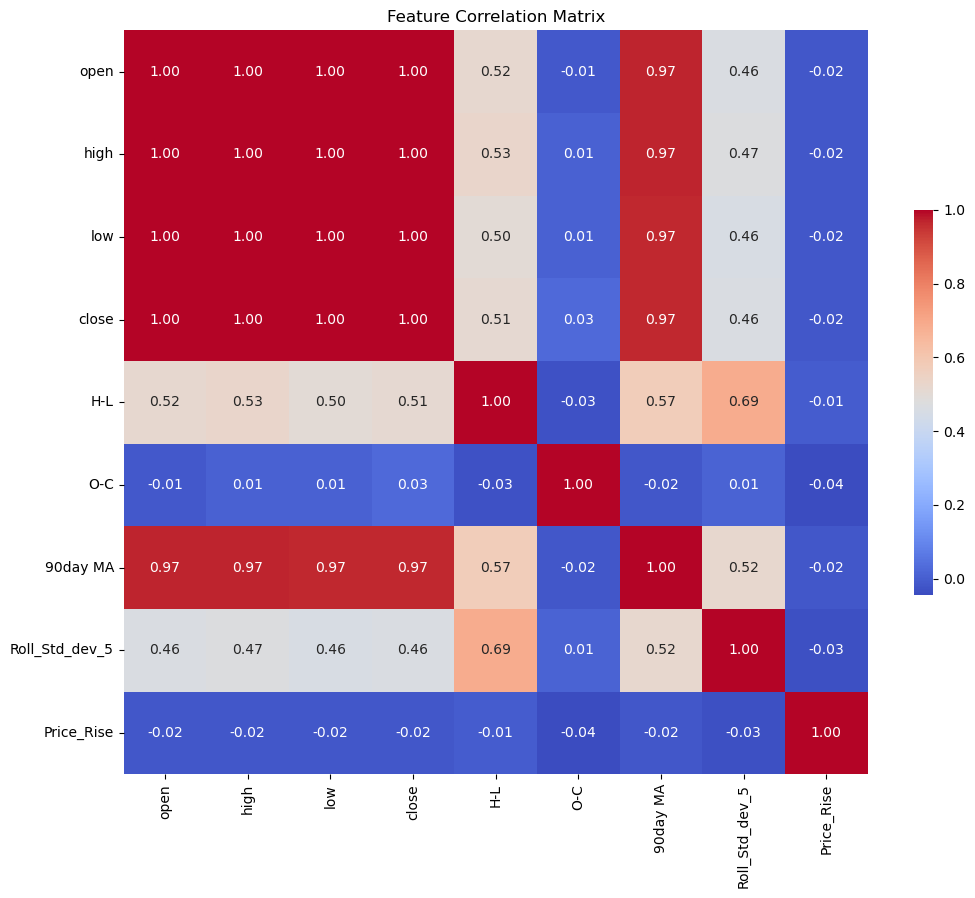

In [23]:
import seaborn as sns

# Calculate the correlation matrix for the features in your dataset
corr_matrix = dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Matrix')
plt.show()

### **EDA Analysis**

Do an EDA analysis of the above features. Present tables/figures and your
discussions.

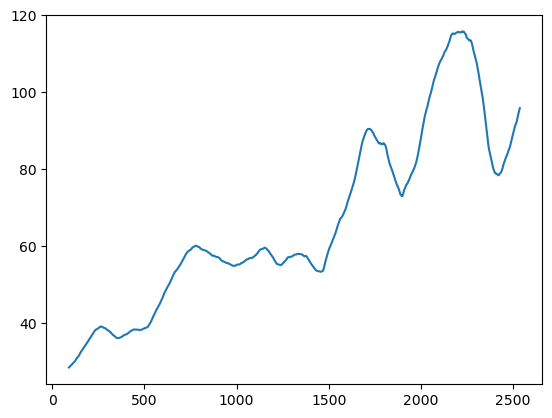

In [24]:
plt.figure()
plt.plot(dataset['90day MA'])
plt.show()

<AxesSubplot:xlabel='90day MA', ylabel='Density'>

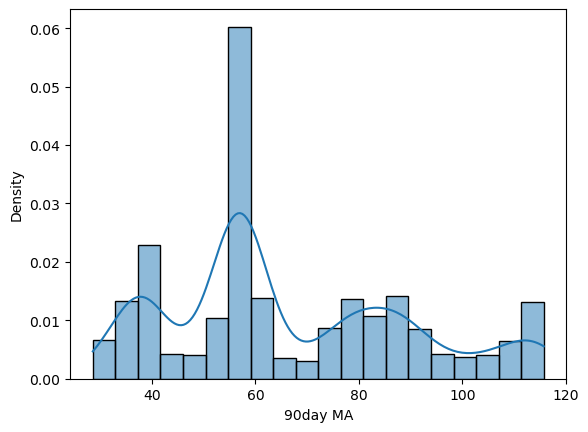

In [25]:
import seaborn as sns
sns.histplot(dataset,x="90day MA", kde=True, stat="density")

In [26]:
dataset.describe()

,open,high,low,close,H-L,O-C,90day MA,Roll_Std_dev_5,Price_Rise
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,67.689034,68.319217,67.047687,67.701884,1.271530,0.012850,66.379405,0.868174,0.516960
std,23.452778,23.693134,23.211018,23.459745,0.937711,0.914078,23.204933,0.766380,0.499814
min,31.174999,31.530001,31.155001,31.170000,0.185001,-5.619995,28.532500,0.040000,0.000000
25%,53.495001,53.945000,53.085001,53.514999,0.629999,-0.400002,53.641389,0.370222,0.000000
50%,59.139999,59.680000,58.650002,59.270000,1.009998,0.019997,58.350222,0.620140,1.000000
75%,85.795002,86.740002,84.660000,85.750000,1.610001,0.455000,83.783555,1.068287,1.000000
max,126.080002,126.320000,124.809998,126.059998,10.619999,5.180000,115.762556,6.453561,1.000000


### **Price Prediction**

Use two machine learning classification methods (e.g., Logistic Regression and Extra Trees) to predict the price rise.

In [27]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [28]:
X

,H-L,O-C,90day MA,Roll_Std_dev_5
90,0.309999,-0.190001,28.532500,0.186635
91,0.395000,0.300001,28.575944,0.243115
92,0.489998,0.375000,28.621222,0.327483
93,0.309999,-0.225000,28.667778,0.238679
94,0.320000,0.179998,28.711278,0.264277
...,...,...,...,...
2532,1.459999,0.239998,95.143222,0.971904
2533,1.239998,0.920006,95.298111,1.141481
2534,1.740005,1.459999,95.462111,1.352583
2535,1.420006,0.279999,95.656000,1.281569


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
X_test

,H-L,O-C,90day MA,Roll_Std_dev_5
2047,2.059998,-1.379997,98.800000,1.032632
2048,1.239998,-1.180000,98.948445,1.646245
2049,3.409996,-1.969994,99.071000,1.579564
2050,3.910004,3.219994,99.195556,1.567896
2051,2.659996,-0.529999,99.363000,1.251319
...,...,...,...,...
2532,1.459999,0.239998,95.143222,0.971904
2533,1.239998,0.920006,95.298111,1.141481
2534,1.740005,1.459999,95.462111,1.352583
2535,1.420006,0.279999,95.656000,1.281569


In [30]:
#Dimensional Reduction

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error
print("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 0.4967076527787373


#### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47       242
           1       0.52      0.59      0.55       248

    accuracy                           0.51       490
   macro avg       0.51      0.51      0.51       490
weighted avg       0.51      0.51      0.51       490



#### Extra Trees

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [36]:
from sklearn.metrics import classification_report
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.63      0.57       242
           1       0.56      0.46      0.50       248

    accuracy                           0.54       490
   macro avg       0.54      0.54      0.54       490
weighted avg       0.54      0.54      0.54       490



### **Cross Validation for Price Predictions**

 For each method, run a cross-validation to calculate the mean and standard deviation of the accuracy.

In [37]:
from sklearn.model_selection import cross_val_score

X_scaled = sc.fit_transform(X)
clf = LogisticRegression(max_iter=10000)
clf_cv_scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (clf_cv_scores.mean(), clf_cv_scores.std() * 2))

Logistic Regression Accuracy: 0.52 (+/- 0.02)


In [38]:
classifier = ExtraTreesClassifier(random_state=101)
extra_trees_cv_scores = cross_val_score(classifier, X_scaled, y, cv=5, scoring='accuracy')
print("Extra Trees Classifier Accuracy: %0.2f (+/- %0.2f)" % (extra_trees_cv_scores.mean(), extra_trees_cv_scores.std() * 2))

Extra Trees Classifier Accuracy: 0.52 (+/- 0.03)


### **Price Prediction Evaluation**

Present an evaluation of these methods based on the outputs.

Use one method (e.g., Extra Trees) to predict the price rise based on your X_test data. Use the test set to obtain a classification report. Draw a plot of the confusion matrix and a ROC plot.

In [39]:
# Extra Trees is the method that we chose

from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [40]:
from sklearn.metrics import classification_report
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.63      0.57       242
           1       0.56      0.46      0.50       248

    accuracy                           0.54       490
   macro avg       0.54      0.54      0.54       490
weighted avg       0.54      0.54      0.54       490



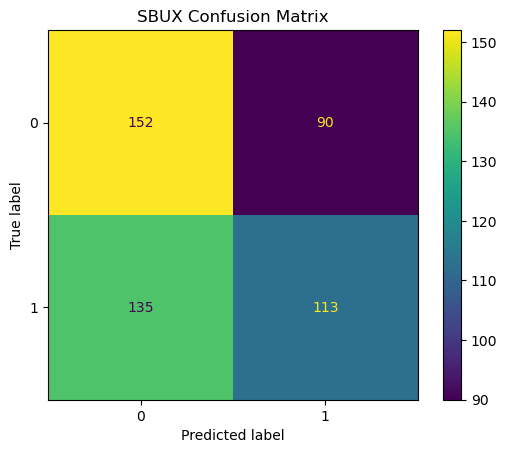

In [41]:
# Evaluate the model by means of a Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['0', '1'] 
matrix = ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, display_labels=labels)  
plt.title('SBUX Confusion Matrix')
plt.show(matrix)
plt.show()

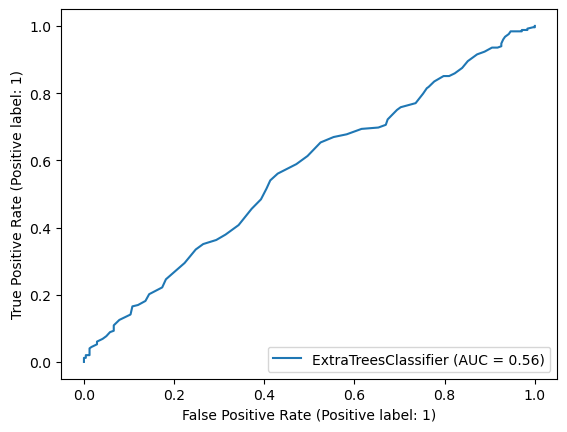

In [42]:
# Evaluate the model by means of a ROC Curve, which only works for a binary target.

from sklearn.metrics import RocCurveDisplay
log_disp = RocCurveDisplay.from_estimator(classifier, X_test, Y_test)

#### Evaluation of Models

### **Price Predictions Market Returns vs Strategy Returns**

Create the columns of Market Returns and Strategy Returns based on your
prediction of price rise.

In [43]:
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()
trade_dataset

,open,high,low,close,H-L,O-C,90day MA,Roll_Std_dev_5,Price_Rise,Y_pred
2047,104.750000,105.279999,103.220001,103.370003,2.059998,-1.379997,98.800000,1.032632,0,1.0
2048,102.989998,102.989998,101.750000,101.809998,1.239998,-1.180000,98.948445,1.646245,0,1.0
2049,103.339996,103.339996,99.930000,101.370003,3.409996,-1.969994,99.071000,1.579564,1,1.0
2050,101.160004,104.510002,100.599998,104.379997,3.910004,3.219994,99.195556,1.567896,0,0.0
2051,104.000000,105.769997,103.110001,103.470001,2.659996,-0.529999,99.363000,1.251319,1,0.0
...,...,...,...,...,...,...,...,...,...,...
2532,106.400002,106.870003,105.410004,106.639999,1.459999,0.239998,95.143222,0.971904,1,0.0
2533,106.059998,107.139999,105.900002,106.980003,1.239998,0.920006,95.298111,1.141481,1,1.0
2534,107.300003,108.800003,107.059998,108.760002,1.740005,1.459999,95.462111,1.352583,1,0.0
2535,108.739998,109.760002,108.339996,109.019997,1.420006,0.279999,95.656000,1.281569,0,0.0


In [44]:
trade_dataset['Market Returns'] = 0.
trade_dataset['Market Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
trade_dataset['Market Returns'] = trade_dataset['Market Returns'].shift(-1)

In [45]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['Y_pred'] == True, 
trade_dataset['Market Returns'], - trade_dataset['Market Returns'])

In [46]:
trade_dataset

,open,high,low,close,H-L,O-C,90day MA,Roll_Std_dev_5,Price_Rise,Y_pred,Market Returns,Strategy Returns
2047,104.750000,105.279999,103.220001,103.370003,2.059998,-1.379997,98.800000,1.032632,0,1.0,-0.015207,-0.015207
2048,102.989998,102.989998,101.750000,101.809998,1.239998,-1.180000,98.948445,1.646245,0,1.0,-0.004331,-0.004331
2049,103.339996,103.339996,99.930000,101.370003,3.409996,-1.969994,99.071000,1.579564,1,1.0,0.029261,0.029261
2050,101.160004,104.510002,100.599998,104.379997,3.910004,3.219994,99.195556,1.567896,0,0.0,-0.008756,0.008756
2051,104.000000,105.769997,103.110001,103.470001,2.659996,-0.529999,99.363000,1.251319,1,0.0,0.043127,-0.043127
...,...,...,...,...,...,...,...,...,...,...,...,...
2532,106.400002,106.870003,105.410004,106.639999,1.459999,0.239998,95.143222,0.971904,1,0.0,0.003183,-0.003183
2533,106.059998,107.139999,105.900002,106.980003,1.239998,0.920006,95.298111,1.141481,1,1.0,0.016502,0.016502
2534,107.300003,108.800003,107.059998,108.760002,1.740005,1.459999,95.462111,1.352583,1,0.0,0.002388,-0.002388
2535,108.739998,109.760002,108.339996,109.019997,1.420006,0.279999,95.656000,1.281569,0,0.0,-0.005703,0.005703


### **Cumulative M.R. vs Cumulative S.R.**

Create the columns of Cumulative Market Returns and Cumulative Strategy Returns based on your prediction of price rise. Plot the time series of these two returns.

We now compute the cumulative returns for both the market and the strategy. These values are computed using the cumsum() function. We will use the cumulative sum to plot the graph of market and strategy returns in the last step.

In [47]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Market Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

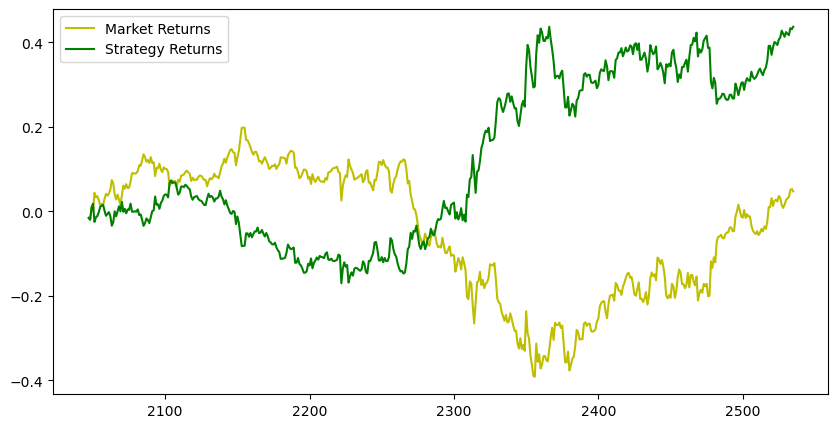

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='y', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

## **ASSUMPTIONS**

Choose one of the assumptions: Machine learning can/cannot predict the rise of the selected stock price data. Provide interpretation and debate based on your results and your selected literature.